# <center> Homomorphic Encryption and Bootstrapping
    
### Date: May 02 - May 06 2022

### Authors: 
- Njaka ANDRIAMANDRATOMANANA
- Elie CHEDEMAIL
- Adéchola KOUANDE
- Rémi LELUC
- Quyen NGUYEN

### Import libraries

In [1]:
import numpy as np
from math import log,floor
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#Tool functions for FHE
from utils import draw_from_binary,draw_from_integer,draw_from_normal
from utils import mod, base_decomp, base_decomp_vec, draw_from_integer_vec

from fhe import LWE, inv_LWE
from fhe import RLWE,inv_RLWE,RLWE_prod
from fhe import RGSW,prod_ext

from utils import draw_from_binary_vec
from bootstrap import get_BK, accu_AP, extract_RLWE, key_switch
from bootstrap import get_BK_dec, accu_AP_dec

### Test basic functions

In [2]:
np.random.seed(1234)
P = draw_from_binary(n=4)
P

poly1d([1, 1, 0, 1, 0])

In [3]:
P.coef

array([1, 1, 0, 1, 0])

represents polynomial: $1x^4 + 1x^3 + 0x^2 + 1x^1 + 0$

In [4]:
np.random.seed(1234)
draw_from_integer(n=8,q=4)

poly1d([3, 3, 2, 1, 0, 0, 0, 1, 3])

In [5]:
np.random.seed(1234)
draw_from_normal(n=32, q=3, loc=0, scale=2)

poly1d([1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2])

### Test RLWE function to perform homomorphic encryption/decryption

In [6]:
# security parameters
N = int(2**8)
q = int(2**5)
𝜎 = 1
t = 2
s = draw_from_binary(n=N)
m_test = draw_from_binary(n=int(2**4))
print("Secret Key")
m_test

Secret Key


poly1d([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [7]:
# perform encryption
a_cifer,b_cifer = RLWE(n=N,q=q,𝜎=𝜎,s=s,t=t,m=m_test)
# display cifer message
b_cifer

poly1d([12, 26, 14,  4,  6, 11,  5, 15,  1, 18,  1, 16, 29, 28,  4, 25, 25,
       21,  1,  4, 15, 17,  7,  3,  4,  1,  0, 20,  7, 20, 20, 11,  4, 31,
        7,  4,  7, 31, 15,  4,  0, 12, 15, 14,  4, 17, 27,  1, 24, 29, 10,
       26,  6, 28, 23, 18, 20,  2, 16,  1,  3, 23,  9,  1, 18,  6, 24,  0,
       11,  0, 31, 27, 22, 29, 14,  3, 15, 21,  3, 10, 30, 23, 16,  0, 19,
       16,  6, 17,  2,  0,  2, 11, 15,  7, 29, 31, 25, 23, 25,  9, 18, 20,
        0, 27, 22,  4, 26, 16, 11, 14,  6, 28, 26,  4,  0, 30,  6,  6, 23,
        8, 27, 18,  0,  8, 15, 12, 31, 25, 22,  5, 16,  0, 24, 25,  2, 16,
        2, 10, 13, 15,  9,  8, 25,  7, 30, 17,  5, 14,  8, 12, 21, 14, 13,
       24, 27, 30, 19, 21, 15, 11,  9, 13, 16, 10, 19,  8,  8, 23,  5, 21,
       12, 23, 10, 18,  8,  6, 17,  3, 26,  9, 14, 31, 25, 20, 10, 12, 24,
       28,  4,  0, 29,  6,  8, 17, 10,  8, 18, 29, 26, 14,  4, 12, 28,  8,
       10, 19,  9, 11, 22, 12, 15,  5, 22, 19,  0, 20, 20,  1,  2, 12,  0,
       20, 22, 11, 17,  

In [8]:
len(a_cifer)

256

In [9]:
m_test

poly1d([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [10]:
m_decifer = inv_RLWE(n=N,a=a_cifer,b=b_cifer,s=s,q=q,t=t)
m_decifer
print("Decoding Successful ?", m_test==m_decifer)

Decoding Successful ? True


In [11]:
m_decifer

poly1d([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

### Plot Figure

In [12]:
probas = np.load(file="results.npy")
𝜎_range = np.linspace(start=0.5,stop=10,num=50)

## $N = 2^9$, $q=2^k$ with $k$ in $\{4,5,6,7,8\}$

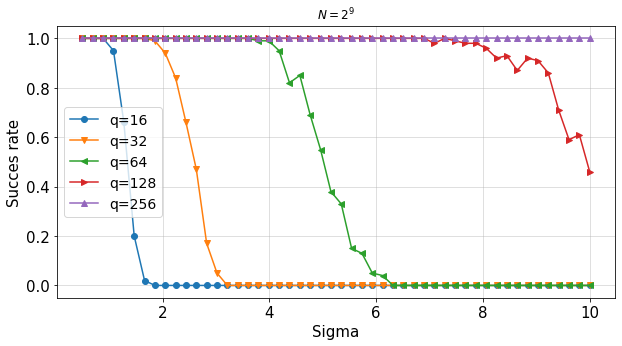

In [13]:
plt.figure(figsize=(10,5))
plt.plot(𝜎_range,probas[0,0,:],marker='o',label='q=16')
plt.plot(𝜎_range,probas[0,1,:],marker='v',label='q=32')
plt.plot(𝜎_range,probas[0,2,:],marker='<',label='q=64')
plt.plot(𝜎_range,probas[0,3,:],marker='>',label='q=128')
plt.plot(𝜎_range,probas[0,4,:],marker='^',label='q=256')
plt.grid(alpha=0.5)
plt.legend()
plt.xlabel('Sigma',fontsize=15)
plt.ylabel('Succes rate',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$N=2^9$')
#plt.savefig(fname='proba_decoding_RLWE_N2e9.pdf',transparent=True,pad_inches=0)
plt.show()

## $N = 2^{10}$, $q=2^k$ with $k$ in $\{4,5,6,7,8\}$

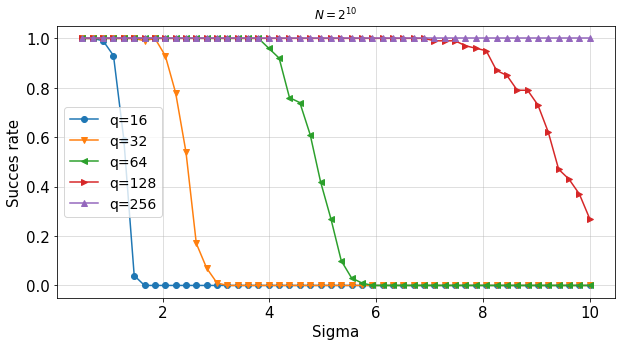

In [14]:
plt.figure(figsize=(10,5))
plt.plot(𝜎_range,probas[1,0,:],marker='o',label='q=16')
plt.plot(𝜎_range,probas[1,1,:],marker='v',label='q=32')
plt.plot(𝜎_range,probas[1,2,:],marker='<',label='q=64')
plt.plot(𝜎_range,probas[1,3,:],marker='>',label='q=128')
plt.plot(𝜎_range,probas[1,4,:],marker='^',label='q=256')
plt.grid(alpha=0.5)
plt.legend()
plt.xlabel('Sigma',fontsize=15)
plt.ylabel('Succes rate',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$N=2^{10}$')
plt.savefig(fname='proba_decoding_RLWE_N2e10.pdf',transparent=True,pad_inches=0)
plt.show()

### Test RLWE_prod to perform product in homomorphically way

In [15]:
# security parameters
N = int(2**9)
q = int(2**8)
B = int(2**2)

print('k=',floor(log(q,B)))
𝜎 = 0.2
t = 2
s = draw_from_binary(n=N)

m0 = draw_from_binary(n=int(2**6))
m1 = np.poly1d([1,0,0])

# compute prod for clear messages
m0m1 = mod(poly=m0*m1,q=q,poly_modulus=np.poly1d([1] + ((N - 1) * [0]) + [1]))
# encode product
a_cifer,b_cifer = RLWE_prod(n=N,q=q,𝜎=𝜎,s=s,t=t,B=B,m0=m0,m1=m1)
# decode product
m0m1_decoded = inv_RLWE(n=N, q=q, s=s, t=t, a=a_cifer, b=b_cifer)
# Test equality
print("Is product recovered ?", m0m1==m0m1_decoded)

k= 4
Is product recovered ? True


### Display messages

In [16]:
m0m1

poly1d([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
m0m1_decoded

poly1d([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

### Observe evolution of noise (succes recovery rate) with sum + and prod x

In [18]:
# load results with sum
probas_sum = np.load('results_sum_2.npy')

## $N = 2^9$, $q=2^k$ with $k$ in $\{4,5,6,7,8\}$ and $l=2$ messages to sum

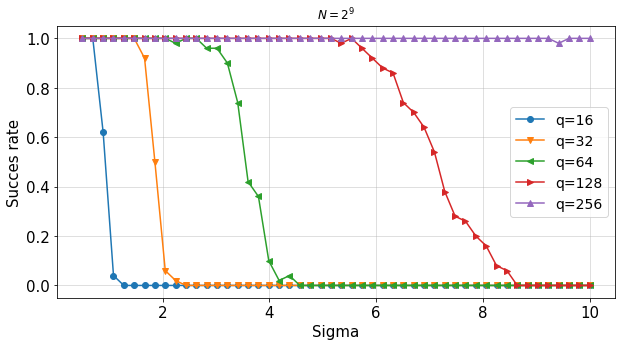

In [19]:
plt.figure(figsize=(10,5))
plt.plot(𝜎_range,probas_sum[0,0,:],marker='o',label='q=16')
plt.plot(𝜎_range,probas_sum[0,1,:],marker='v',label='q=32')
plt.plot(𝜎_range,probas_sum[0,2,:],marker='<',label='q=64')
plt.plot(𝜎_range,probas_sum[0,3,:],marker='>',label='q=128')
plt.plot(𝜎_range,probas_sum[0,4,:],marker='^',label='q=256')
plt.grid(alpha=0.5)
plt.legend()
plt.xlabel('Sigma',fontsize=15)
plt.ylabel('Succes rate',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$N=2^9$')
#plt.savefig(fname='proba_decoding_sum_N2e9.pdf',transparent=True,pad_inches=0)
plt.show()

## $N = 2^{10}$, $q=2^k$ with $k$ in $\{4,5,6,7,8\}$ and $l=2$ messages to sum

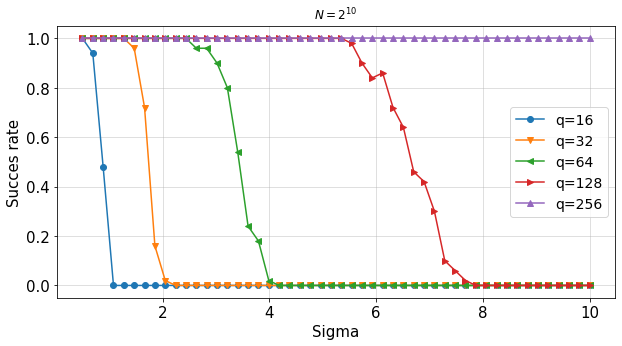

In [20]:
plt.figure(figsize=(10,5))
plt.plot(𝜎_range,probas_sum[1,0,:],marker='o',label='q=16')
plt.plot(𝜎_range,probas_sum[1,1,:],marker='v',label='q=32')
plt.plot(𝜎_range,probas_sum[1,2,:],marker='<',label='q=64')
plt.plot(𝜎_range,probas_sum[1,3,:],marker='>',label='q=128')
plt.plot(𝜎_range,probas_sum[1,4,:],marker='^',label='q=256')
plt.grid(alpha=0.5)
plt.legend()
plt.xlabel('Sigma',fontsize=15)
plt.ylabel('Succes rate',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$N=2^{10}$')
#plt.savefig(fname='proba_decoding_sum_N2e10.pdf',transparent=True,pad_inches=0)
plt.show()

## $N = 2^9$, $q=2^k$ with $k$ in $\{4,5,6,7,8\}$ and $l=2$ messages to prod

In [21]:
# load results with prod
probas = np.load('results_prod_2.npy')

In [22]:
𝜎_range = np.linspace(start=0.01, stop=0.3, num=50)

In [23]:
probas[0,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

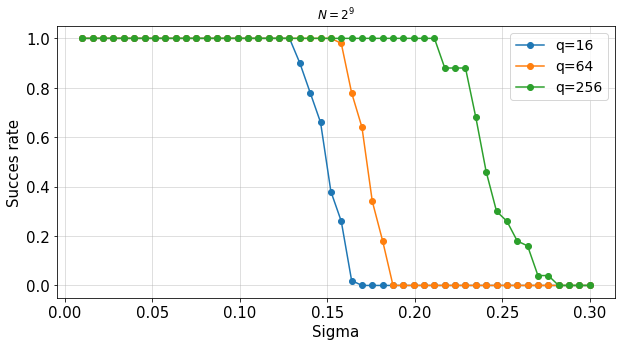

In [24]:
plt.figure(figsize=(10,5))
plt.plot(𝜎_range,probas[0,0,:],marker='o',label='q=16')
#plt.plot(𝜎_range,probas[0,1,:],marker='o',label='q=32')
plt.plot(𝜎_range,probas[0,2,:],marker='o',label='q=64')
#plt.plot(𝜎_range,probas[0,3,:],marker='o',label='q=128')
plt.plot(𝜎_range,probas[0,4,:],marker='o',label='q=256')
plt.grid(alpha=0.5)
plt.legend()
plt.xlabel('Sigma',fontsize=15)
plt.ylabel('Succes rate',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$N=2^9$')
#plt.savefig(fname='proba_decoding_prod_N2e9.pdf',transparent=True,pad_inches=0)
plt.show()

## $N = 2^{10}$, $q=2^k$ with $k$ in $\{4,5,6,7,8\}$ and $l=2$ messages to prod

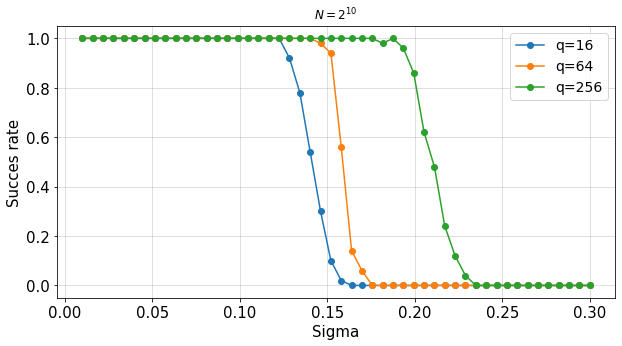

In [27]:
plt.figure(figsize=(10,5))
plt.plot(𝜎_range,probas[1,0,:],marker='o',label='q=16')
#plt.plot(𝜎_range,probas[1,1,:],marker='o',label='q=32')
plt.plot(𝜎_range,probas[1,2,:],marker='o',label='q=64')
#plt.plot(𝜎_range,probas[1,3,:],marker='o',label='q=128')
plt.plot(𝜎_range,probas[1,4,:],marker='o',label='q=256')
plt.grid(alpha=0.5)
plt.legend()
plt.xlabel('Sigma',fontsize=15)
plt.ylabel('Succes rate',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$N=2^{10}$')
plt.savefig(fname='proba_decoding_prod_N2e10.pdf',transparent=True,pad_inches=0)
plt.show()

### Test KeySwitch

In [ ]:
# security parameters
N = int(2**9)
q = int(2**8)
B = int(2**2)

print('k=',floor(log(q,B)))
𝜎 = 0.5
t = 2

s_ini = draw_from_binary(n=N)
s_new = draw_from_binary(n=N)

# draw message
m0 = draw_from_binary(n=int(2**3))
# code with secret key s
a_in,b_in = RLWE(n=N,q=q,𝜎=𝜎,s=s_ini,t=t,m=m0)

In [ ]:
# Perform keyswitch
a_new, b_new = key_switch(n=N, q=q, B=B,σ=0.1, t=t,s=s_new, s_prime=s_ini, a_prime=a_in, b_prime=b_in)
# decode
m_decoded = inv_RLWE(n=N, q=q, s=s_new, t=t, a=a_new, b=b_new)

### Test BootStrap

We test bootstrap-AP without the KeySwitch, i.e., we decode the last LWE with the new key s'

In [23]:
# security parameters
N = int(2**5)
q = int(2**6)
B = int(2**2)

print('k=',int(round(log(q,B))))
𝜎 = 0
t = 4

s_ini = np.zeros(N)
s_ini[0] = 1
s_ini = s_ini.astype(int)
print('s_ini:', s_ini)
s_new = draw_from_binary(n=N-1)

# get matrix of Bootstrap Keys
BK = get_BK(n=N,q=q,σ=0,t=t,B=B,s=s_ini,s_prime=s_new)

  0%|          | 0/32 [00:00<?, ?it/s]

k= 3
s_ini: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


100%|██████████| 32/32 [00:18<00:00,  1.77it/s]


In [24]:
s_new.coef

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

### Compute Polynomial $w(X)= \sum_{i=0}^{N-1} w_i X^i$ such that $w_i=q/4$ for $N/4 \leq i < 3N/4$ and $w_i=0$ otherwise

In [25]:
val = int(q/4)
coef_W = np.zeros(N)
coef_W[int(N/4):int(3*N/4)] = val
W = np.poly1d(coef_W.astype(int))

In [26]:
W

poly1d([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  0,
        0,  0,  0,  0,  0,  0,  0])

### Draw test messages $m \in \{0,1\}$

In [27]:
# draw message
m0 = np.array([0])
m1 = np.array([1])

In [33]:
s_new

poly1d([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

### Bootstrap with $m_0 = 0$

In [32]:
p = 0
for _ in range(1): 
    a,b = LWE(n=N, q=q, σ=0, s=s_ini, t=t, m=m0)
    # Step 1. ACC-part to get RLWE under s_prime
    a_prime, b_prime = accu_AP(n=N,q=q,B=B,a=a,b=b,w=W,BK=BK)
    #print('b_prime =',b_prime.coef)
    #print('coeff = ', inv_RLWE(n=N, q=q, s=s_new, t=t, a=a_prime, b=b_prime).coef)
    result = inv_RLWE(n=N, q=q, s=s_new, t=t, a=a_prime, b=b_prime).coef[-1]
    temp = mod(poly=b_prime-(a_prime*s_new),q=q,
               poly_modulus=np.poly1d([1] + (int(N - 1) * [0]) + [1]))
    print('temp', temp.coef)
    print('result =', result)
    p += result

temp [16 16 16 16 16 16 16 16 16 16 16 16  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 48 48 48 48]
result = 3


In [29]:
a_prime

poly1d([18, 30, 38, 27,  4, 27, 40, 45, 18, 48,  6, 34,  1, 42, 13, 55, 22,
       38, 39, 15, 59, 23, 49, 63, 30, 25,  6, 60, 47, 50,  9,  5])

In [30]:
b_prime

poly1d([ 2,  6, 12, 35, 48, 57, 13, 22, 62,  0, 60, 38, 23, 38, 60, 56, 58,
       59, 33, 32, 29,  9, 41,  6, 15, 52, 40, 51, 60,  0, 13, 56])

In [ ]:
N

In [16]:
b

array([58])

In [ ]:
b = 16
monomial = np.poly1d([-1] + (N  - b) * [0])
monomial.coef

In [ ]:
mono = mod(poly=monomial*W,q=q,
           poly_modulus=np.poly1d([1] + ((N - 1) * [0]) + [1]))

In [ ]:
mono

In [ ]:
len(monomial.coef)

In [ ]:
acc_a = np.poly1d([0])
acc_b = mod(poly=(monomial*W),q=q,
             poly_modulus=np.poly1d([1] + ((N - 1) * [0]) + [1]))

In [ ]:
acc_b

In [ ]:
print('coeff = ', inv_RLWE(n=N, q=q, s=s_new, t=t, a=acc_a, b=acc_b).coef)
result = inv_RLWE(n=N, q=q, s=s_new, t=t, a=acc_a, b=acc_b).coef[-1]

In [ ]:
result

In [ ]:
# perform trivial RLWE(0,X^{-b} w(X))
acc_a = np.poly1d([0])
monomial = np.poly1d([-1] + (n - b) * [0])
acc_b = mod(poly=(monomial*w),q=q,
             poly_modulus=np.poly1d([1] + ((n - 1) * [0]) + [1]))
# perform recursive blind rotations
for i in range(n):
    # perform external prod RLWE x RGSW
    acc_a, acc_b = prod_ext(n=n,q=q,a=acc_a,b=acc_b,
                            B=B,M=BK[i,a[i]])

In [ ]:
p

In [ ]:
a_prime

In [ ]:
b_prime

In [ ]:

# Step 3. Extract cipher LWE of coeff_0(RLWE_{s})
a_0, b_0 = extract_RLWE(n=N,a=a_prime,b=b_prime,i_coeff=0)
if len(s_new.coef)<N:
    s_new_vec = np.insert(s_new.coef,0,(N-len(s_new.coef))*[0])
else:
    s_new_vec = s_new.coef
# decode message under key s_new
res = np.array([inv_LWE(n=N, q=q, s=s_new_vec, t=t, a=a_0, b=b_0) % 2])

In [ ]:
res

In [ ]:


    p += int(m0==res)
print('proba=',p/N_exp)

### Bootstrap with $m_1 = 1$

In [9]:
p = 0
N_exp = 20
for _ in tqdm(range(N_exp)):
    a,b = LWE(n=N, q=q, σ=σ, s=s_ini, t=t, m=m1)
    # Step 1. ACC-part to get RLWE under s_prime
    a_prime, b_prime = accu_AP(n=N,q=q,B=B,a=a,b=b,w=W,BK=BK)
    # Step 3. Extract cipher LWE of coeff_0(RLWE_{s})
    a_0, b_0 = extract_RLWE(n=N,a=a_prime,b=b_prime,i_coeff=0)
    if len(s_new.coef)<N:
        s_new_vec = np.insert(s_new.coef,0,(N-len(s_new.coef))*[0])
    else:
        s_new_vec = s_new.coef
    # decode message under key s_new
    res = np.array([inv_LWE(n=N, q=q, s=s_new_vec, t=t, a=a_0, b=b_0) % 2])
    p += int(m0==res)
print('proba=',p/N_exp)


proba= 0.4


### Bootstrap with AP-decomposition Br

In [ ]:
# security parameters
N = int(2**5)
q = int(2**4)
B = int(2**2)
Br = 2

print('k=',floor(log(q,B)))
𝜎 = 0.5
t = 4

s_ini = draw_from_binary_vec(n=N)
s_new = draw_from_binary(n=N-1)

# get matrix of Bootstrap Keys
BK = get_BK_dec(n=N,q=q,σ=σ,t=t,B=B,Br=Br,s=s_ini,s_prime=s_new)

In [ ]:
val = int(q/4)
coef_W = np.zeros(N)
coef_W[int(N/4):int(3*N/4)] = val
W = np.poly1d(coef_W)

In [ ]:
# draw message
m0 = np.array([0])
m1 = np.array([1])

### Bootstrap AP-dec with $m_0 = 0$

In [ ]:
BK.shape

In [ ]:
p = 0
N_exp = 100
for _ in tqdm(range(N_exp)):
    a,b = LWE(n=N, q=q, σ=σ, s=s_ini, t=t, m=m0)
    # Step 1. ACC-part to get RLWE under s_prime
    a_prime, b_prime = accu_AP_dec(n=N,q=q,B=B,Br=Br,a=a,b=b,w=W,BK=BK)
    # Step 3. Extract cipher LWE of coeff_0(RLWE_{s})
    a_0, b_0 = extract_RLWE(n=N,a=a_prime,b=b_prime,i_coeff=0)
    if len(s_new.coef)<N:
        s_new_vec = np.insert(s_new.coef,0,(N-len(s_new.coef))*[0])
    else:
        s_new_vec = s_new.coef
    # decode message under key s_new
    res = np.array([inv_LWE(n=N, q=q, s=s_new_vec, t=t, a=a_0, b=b_0) % 2])
    p += int(m0==res)
print('proba=',p/N_exp)

### Bootstrap AP-dec with $m_1 = 1$